# 00 Deep Q agent with full experimentation tracking

#### 👉 Deep RL is complex, because it's extreme sensitivity to the hyper-parameters.

#### 👉 To develop, debug and optimize RL agents you need to experiment a lot. And to experiment well, you need to use the right tool.

#### 👉When I started working on RL I used Tensorboard (for plots) + MLFlow (metrics and artifacts logging).

#### 👉Nowadays, my favourite too is [Neptune.ai](https://neptune.ai/). It combines the best of both Tensorboard and MlFlow. And it is FREE for individuals like you you and me.

[![](https://camo.githubusercontent.com/51f9ec0b7f6d5a4f51d78a59c860d02c80f58f6d84ae85e6e7122c92f7776346/68747470733a2f2f6e657074756e652e61692f77702d636f6e74656e742f75706c6f6164732f6e657074756e652d6c6f676f2d6c6573732d6d617267696e2d65313631313933393734323638332e706e67)](https://neptune.ai/)

#### 👉 Let's train a Deep Q agent to solve the `Cart Pole` environment, with FULL tracking.

![nn](https://github.com/Paulescu/hands-on-rl/blob/main/03_cart_pole/images/neural_net.jpg?raw=true)

In [63]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [64]:
import gym
env = gym.make('CartPole-v1')

## Create a Neptune run

In [65]:
# %env NEPTUNE_PROJECT=<PLACE_HOLDER_1>
# %env NEPTUNE_API_TOKEN=<PLACE_HOLDER_2>

In [66]:
import os
import neptune.new as neptune

try:
    NEPTUNE_PROJECT = os.environ['NEPTUNE_PROJECT']
    NEPTUNE_API_TOKEN = os.environ['NEPTUNE_API_TOKEN']
except:
    print('Set environment variables NEPTUNE_PROJECT and NEPTUNE_API_TOKEN')
    raise

run = neptune.init(
    project=NEPTUNE_PROJECT,
    api_token=NEPTUNE_API_TOKEN,
)

https://app.neptune.ai/plabartabajo/parametric-q-learning-cart-pole/e/PAR-47
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


## Hyperparameters

In [67]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.00016151809562265122,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 8,
    'freq_steps_update_target': 10,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 16,
    'nn_hidden_layers': [256, 256],
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.14856584122699473,
    'steps_epsilon_decay': 10000,
}

# SEED = 2386916045
SEED = 0

### Log hyperparameters 

In [68]:
run['parameters'] = hparams
run['parameters/seed'] = SEED

## ⚠️ Fix random seeds to ensure reproducible runs

In [69]:
from src.utils import set_seed
set_seed(env, SEED)

## Deep Q-Agent

In [70]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams, run=run)

67,586 parameters


## Train the agent 🏋️

In [71]:
from src.loops import train
train(agent, env, n_episodes=500, run=run)

100%|██████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.07it/s]


### Log PyTorch model

In [72]:
# log PyTorch model
agent.save_checkpoint()

## Evaluate the agent ⏱️

In [73]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.00
)

import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

100%|██████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.96it/s]

Reward average 269.61, std 70.59


### Log evaluation metrics

In [74]:
# log eval metrics
run['eval/reward_avg'] = reward_avg
run['eval/reward_std'] = reward_std

## Plot evaluation rewards

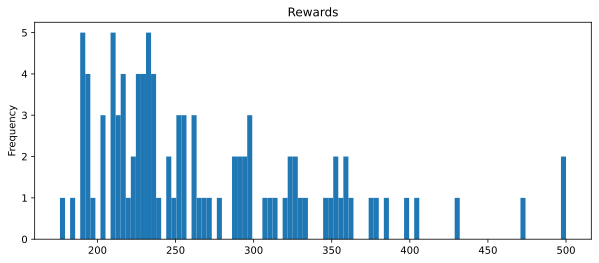

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

### Log plot

In [76]:
run['eval_rewards'].upload(fig)

## End of the experiment

In [77]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 12 operations to synchronize with Neptune. Do not kill this process.


All 12 operations synced, thanks for waiting!


## Experiment results are here 👇🏽

In [81]:
print(run.get_run_url())

https://app.neptune.ai/plabartabajo/parametric-q-learning-cart-pole/e/PAR-47
